# **Project Name**    - CreditCard Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Md Ismail Quraishi

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Capstone Project/Classification/creditcard default predictons/default of credit card clients.xls'
default_df = pd.read_excel(path)

### Dataset First View

In [4]:
# Dataset First Look
default_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
default_df.shape

(30001, 25)

### Dataset Information

In [6]:
# Dataset Info
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
default_df.duplicated().value_counts()

False    30001
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
# function to calculate the number of null values
def null_calculator(df):
  try:
    result = {}
    for col in df.columns:
      result[col] = len(df[df[col].isna() == True])
    return result
  except:
    print('Invalid input')


null_calculator(default_df)

{'Unnamed: 0': 0,
 'X1': 0,
 'X2': 0,
 'X3': 0,
 'X4': 0,
 'X5': 0,
 'X6': 0,
 'X7': 0,
 'X8': 0,
 'X9': 0,
 'X10': 0,
 'X11': 0,
 'X12': 0,
 'X13': 0,
 'X14': 0,
 'X15': 0,
 'X16': 0,
 'X17': 0,
 'X18': 0,
 'X19': 0,
 'X20': 0,
 'X21': 0,
 'X22': 0,
 'X23': 0,
 'Y': 0}

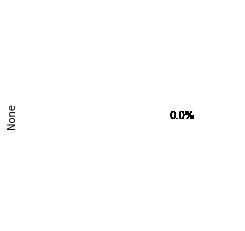

In [9]:
# Visualizing the missing values
pd.Series(null_calculator(default_df)).plot.pie(autopct='%0.01f%%')
plt.show()

### What did you know about your dataset?

The dataset has 30001 rows and 25 columns where first row contains actual name of the columns. The dataset does not have any missing or duplicate value.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
default_df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [11]:
# Dataset Describe
pd.set_option('display.max_columns', None)
default_df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,11,11,22724,22347,22027,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Variables Description 

* 0 - ID of customers
* X1 - Limit of the balance
* X2 - Gender of the customers
* X3 - Qualification of the customers
* X4 - Martial Status
* X5 - Age
* X6,X7,X8,X9,X10,X11 - PAY0,PAY2,PAY3,PAY4,PAY5,PAY6
* X12,X13,X14,X15,X16,X17 - BILL_AMT1 to BILL_AMT6
* X18,X19,X20,X21,X22,X23 - PAY_AMT1 to PAT_AMT6
* Y - Target variable that is next month default predicted customers.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print('Number of unique values for each variable is :')
default_df.nunique()

Number of unique values for each variable is :


Unnamed: 0    30001
X1               82
X2                3
X3                8
X4                5
X5               57
X6               12
X7               12
X8               12
X9               12
X10              11
X11              11
X12           22724
X13           22347
X14           22027
X15           21549
X16           21011
X17           20605
X18            7944
X19            7900
X20            7519
X21            6938
X22            6898
X23            6940
Y                 3
dtype: int64

In [13]:
# Unique values
for col in default_df.columns:
  print(col,' : ',default_df[col].unique())

Unnamed: 0  :  ['ID' 1 2 ... 29998 29999 30000]
X1  :  ['LIMIT_BAL' 20000 120000 90000 50000 500000 100000 140000 200000 260000
 630000 70000 250000 320000 360000 180000 130000 450000 60000 230000
 160000 280000 10000 40000 210000 150000 380000 310000 400000 80000 290000
 340000 300000 30000 240000 470000 480000 350000 330000 110000 420000
 170000 370000 270000 220000 190000 510000 460000 440000 410000 490000
 390000 580000 600000 620000 610000 700000 670000 680000 430000 550000
 540000 1000000 530000 710000 560000 520000 750000 640000 16000 570000
 590000 660000 720000 327680 740000 800000 760000 690000 650000 780000
 730000]
X2  :  ['SEX' 2 1]
X3  :  ['EDUCATION' 2 1 3 5 4 6 0]
X4  :  ['MARRIAGE' 1 2 3 0]
X5  :  ['AGE' 24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22
 25 31 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66
 62 70 72 64 65 71 69 68 79 74]
X6  :  ['PAY_0' 2 -1 0 -2 1 3 4 8 7 5 6]
X7  :  ['PAY_2' 2 0 -1 -2 3 5 7 4 1 6 8]
X8  :  ['PAY_3' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

df = default_df.copy()
# renaming the columns and dropping first row
renamed_col = {"Unnamed: 0" : 'ID', 'X1':'LIMIT_BAL','X2':'SEX','X3':'EDUCATION','X4':'MARRIAGE','X5':'AGE',
               'X6':'PAY_0','X7':'PAY_2','X8':'PAY_3','X9':'PAY_4','X10':'PAY_5','X11':'PAY_6',
              'X12':'BILL_AMT1','X13':'BILL_AMT2','X14':'BILL_AMT3','X15':'BILL_AMT4','X16':'BILL_AMT5','X17':'BILL_AMT6',
              'X18':'PAY_AMT1','X19':'PAY_AMT2','X20':'PAY_AMT3','X21':'PAY_AMT4','X22':'PAY_AMT5','X23':'PAY_AMT6','Y':'default'}

df.rename(columns=renamed_col,inplace = True)
df = df[ df['ID'] != 'ID']

In [15]:
# Count of defaul and non default customers
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [16]:
# Assigning data for default customers to a variable
df_defaulted = df[df.default == 1]
df_defaulted.shape

(6636, 25)

In [17]:
# Number of defaults for each catagories of sex
df_defaulted.groupby('SEX')['default'].sum().reset_index()

,SEX,default
0,1,2873
1,2,3763


In [18]:
# Number of defaults for each catagories of Education
df_defaulted.groupby('EDUCATION')['default'].sum().reset_index()

,EDUCATION,default
0,1,2036
1,2,3330
2,3,1237
3,4,7
4,5,18
5,6,8


In [19]:
# Number of defaults for each catagories of Martial status
df_defaulted.groupby('MARRIAGE')['default'].sum().reset_index()

,MARRIAGE,default
0,0,5
1,1,3206
2,2,3341
3,3,84


In [20]:
# Number of defaults for each catagories of AGE
df_age = df_defaulted.groupby('AGE')['default'].sum().reset_index().sort_values(by='default',ascending=False)
df_age.shape

(53, 2)

In [21]:
# Number of defaults for each catagories of PAY_0
df_defaulted.groupby('PAY_0')['default'].sum().reset_index().sort_values(by='default',ascending=False)

,PAY_0,default
2,0,1888
4,2,1844
3,1,1252
1,-1,954
0,-2,365
5,3,244
6,4,52
7,5,13
10,8,11
9,7,7


In [22]:
# Number of defaults for each catagories of PAY_2
df_defaulted.groupby('PAY_2')['default'].sum().reset_index().sort_values(by='default',ascending=False)

,PAY_2,default
2,0,2503
4,2,2184
1,-1,966
0,-2,691
5,3,201
6,4,50
7,5,15
9,7,12
8,6,9
3,1,5


In [23]:
# Number of defaults for each catagories of PAY_3
df_defaulted.groupby('PAY_3')['default'].sum().reset_index().sort_values(by='default',ascending=False)

,PAY_3,default
2,0,2751
4,2,1969
1,-1,926
0,-2,757
5,3,138
6,4,44
9,7,22
8,6,14
7,5,12
10,8,2


In [24]:
# Number of defaults for each catagories of PAY_4
df_defaulted.groupby('PAY_4')['default'].sum().reset_index().sort_values(by='default',ascending=False)

,PAY_4,default
2,0,3016
4,2,1653
1,-1,904
0,-2,837
5,3,110
9,7,48
6,4,46
7,5,18
8,6,2
3,1,1


In [25]:
# Number of defaults for each catagories of PAY_5
df_defaulted.groupby('PAY_5')['default'].sum().reset_index().sort_values(by='default',ascending=False)

,PAY_5,default
2,0,3195
3,2,1423
1,-1,897
0,-2,895
4,3,113
5,4,51
8,7,48
6,5,10
7,6,3
9,8,1


In [26]:
# Number of defaults for each catagories of PAY_6
df_defaulted.groupby('PAY_6')['default'].sum().reset_index().sort_values(by='default',ascending=False)

,PAY_6,default
2,0,3069
3,2,1401
0,-2,981
1,-1,975
4,3,118
8,7,38
5,4,31
7,6,14
6,5,7
9,8,2


### What all manipulations have you done and insights you found?

1. First of all I renamed the columns and dropped the first row.

2. Then I assigned customer's data which are predicted as default to a variable.

3. After that I checked number of default for each category of SEX,  EDUCATION, MARRIAGE,   AGE,  PAY_0, PAY_2  to PAY 6.
4. 6636 customers are predicted as default.

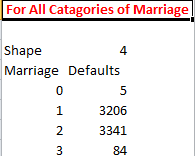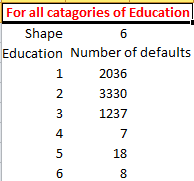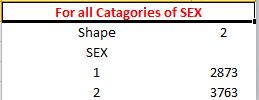

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart of Target feature

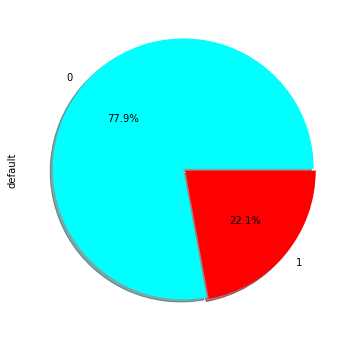

In [27]:
# Chart - 1 visualization code
plt.rcParams['figure.figsize'] =(6,6)
df['default'].value_counts().plot.pie(autopct='%0.01f%%', colors={'red','cyan'},shadow= True, explode=[0.01,0.01])
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses the part to whole relationship with the data. I picked this chart to see percentage of default and default data.

##### 2. What is/are the insight(s) found from the chart?

I found that 77.9% of customers are not predicted as default and 22.1% are predicted as default.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, dataset is not balanced which will not give good accuracy when ML algorithm is applied. Since 22% of the customers are predicted as default therefore it is very risky in business point of view.

#### Chart - 2 - Pie chart for sex column

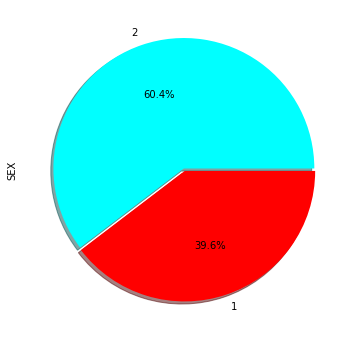

In [28]:
# Chart - 2 visualization code
df['SEX'].value_counts().plot.pie(autopct='%0.01f%%', colors={'red','cyan'},shadow= True, explode=[0.01,0.01])
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses part to whole relationship with the data therefore I picked this chart to see percentage of customers for each SEX group.

##### 2. What is/are the insight(s) found from the chart?

I found that 60.4% of customers havs gender 2 and 39.6% of are in gender 1.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In business perspective gender 2 customers are vary important for us therefore e should do more focus on that catagory.

#### Chart - 3 - Bar chart for EDUCATION

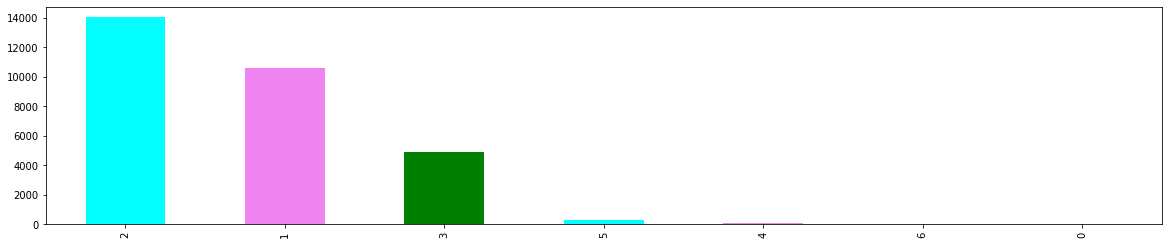

In [29]:
# Chart - 3 visualization code
df['EDUCATION'].value_counts().plot.bar(color= ['cyan','violet','green'],figsize=(20,4))
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows value counts for different variables and I picked this chart to see number of customers for each catagories of education.

##### 2. What is/are the insight(s) found from the chart?

I found that about 14000 customers of catagory 2, approximately 11000 of catagory 1, approximately 6000 for catagory 3 and 0 to 20 for catagories 0,5,6.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [30]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [31]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [32]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [33]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [34]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [35]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [36]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [37]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [38]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [39]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [40]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [41]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [61]:
# Transform Your data

### 6. Data Scaling

In [62]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [63]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [65]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [71]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***